## Here we try to predict petal width from the sepal length, sepal width, and petal width

Early stopping at epoch 60
Enter the file path to save the model: train_regression1_model


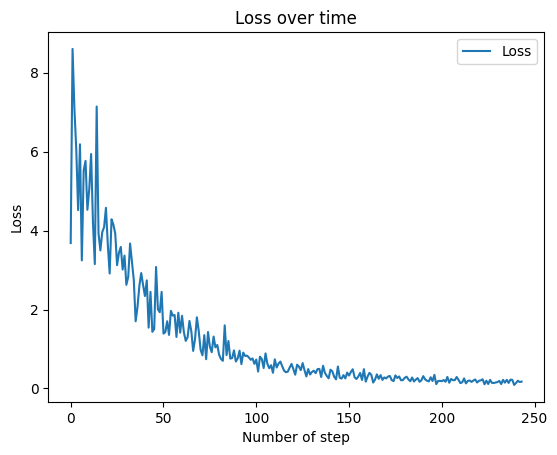

In [2]:
%matplotlib inline

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LinearRegression import LinearRegression

from sklearn.datasets import load_iris
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection  import train_test_split


iris = load_iris()
# print(iris.feature_names)


# separating out X and y
X, y = iris.data[:, :3], iris.data[:, 3]

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.9)


scaler = StandardScaler()

# Scaling the datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#initialize the model
lin_reg = LinearRegression()

# fitting the parameters to the model
loss_history = lin_reg.fit(X_train_scaled, y_train, regularization = 0.1)

#making the prediction on the model
y_predict = lin_reg.predict(X_test_scaled)

# The loss score of a model
loss_score = lin_reg.score(X_test_scaled, y_test)

# Saving the model
model = {
    'parameters': np.concatenate([lin_reg.bias.reshape(1), lin_reg.weights]),
    'X_test': X_test_scaled,
    'y_test': y_test
}
file_path = input('Enter the file path to save the model: ')
with open(file_path, 'wb') as file:
    pickle.dump(model, file)


# Plotting the loss history at each step
plt.plot(loss_history, label = 'Loss')
plt.title('Loss over time')
plt.ylabel('Loss')
plt.xlabel('Number of step')

plt.legend()
plt.show()